In [24]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [5]:
# Define the path to the data file
data_path = Path("../data/processed/asomata_cleaned.xlsx")

# Load the data
df = pd.read_excel(data_path)

# Display the first few rows to verify the data loaded correctly
print(f"Loaded data with {df.shape[0]} rows and {df.shape[1]} columns")
df.head()

Loaded data with 3621 rows and 42 columns


,Date,Production Unit I (MWh),Production Unit II (MWh),Total HPP,Auxiliaries Consumptions Unit I (MWh),Auxiliaries Consumptions Unit II (MWh),Auxiliaries Consumptions Grid (MWh),Net Production (MWh),Peak (MW),Hours of Operation Unit I,...,HPP Sfikia Water Production (m3 x 1000),HPP Sfikia Water Pumped upstream (m3 x 1000),Lake natural inflow (m3 x 1000),Losses (m3 x 1000),B,Regulating lake Water flow (m3/s),Regulating lake Total Water (m3 x 1000),Year,Month,SourceFile
0,1,590,160,750,0.0,0.0,5,745,105,13.2,...,9840.4,2872.340426,243.940426,60,NaN,89.722222,7752.00,2014,1,2014_01_Asomata_english.xlsx
1,2,600,0,600,0.0,0.0,5,595,55,12.9,...,7784.0,1840.425532,56.425532,60,NaN,70.138889,6060.00,2014,1,2014_01_Asomata_english.xlsx
2,3,235,0,235,0.0,0.0,4,231,54,5.5,...,2628.0,0.000000,156.500000,30,NaN,29.103009,2514.50,2014,1,2014_01_Asomata_english.xlsx
3,4,355,0,355,0.0,0.0,5,350,54,7.0,...,3268.8,2356.382979,256.392979,60,NaN,42.000116,3628.81,2014,1,2014_01_Asomata_english.xlsx
4,5,195,0,195,0.0,0.0,5,190,40,5.0,...,2275.2,0.000000,81.300000,150,NaN,24.149306,2086.50,2014,1,2014_01_Asomata_english.xlsx


In [6]:
# Check the data types of each column
print("Data types for each column:")
df.dtypes

Data types for each column:


Date                                               int64
Production Unit I (MWh)                            int64
Production Unit II (MWh)                           int64
Total HPP                                          int64
Auxiliaries Consumptions Unit I (MWh)            float64
Auxiliaries Consumptions Unit II (MWh)           float64
Auxiliaries Consumptions Grid (MWh)                int64
Net Production (MWh)                               int64
Peak (MW)                                          int64
Hours of Operation Unit I                        float64
Hours of Operation Unit II                       float64
Unit I Maintenance Plant                         float64
Unit I Maintenance Outside                       float64
Unit I Failure Plant                             float64
Unit I Failure Outside                           float64
Unit II Maintenance Plant                        float64
Unit II Maintenance Outside                      float64
Unit II Failure Plant          

In [7]:
# Drop SourceFile, Date.1, and B columns
df = df.drop(columns=['SourceFile', 'Date.1', 'B', 'Comments'], errors='ignore')

# Get all column names
all_cols = df.columns.tolist()

# Remove Year and Month if they exist (so we don't duplicate them)
cols_without_year_month = [col for col in all_cols if col not in ['Year', 'Month']]

# Create new column order with Year and Month first, then all other columns
new_col_order = ['Year', 'Month'] + cols_without_year_month

# Reindex the dataframe with the new column order
df = df[new_col_order]

# Display the result
print("DataFrame with reorganized columns:")
df.head()

DataFrame with reorganized columns:


,Year,Month,Date,Production Unit I (MWh),Production Unit II (MWh),Total HPP,Auxiliaries Consumptions Unit I (MWh),Auxiliaries Consumptions Unit II (MWh),Auxiliaries Consumptions Grid (MWh),Net Production (MWh),...,Catchment water inflow,Production Water Consumption (m3 x 1000),Specific Consumption,Turbine Efficiency,HPP Sfikia Water Production (m3 x 1000),HPP Sfikia Water Pumped upstream (m3 x 1000),Lake natural inflow (m3 x 1000),Losses (m3 x 1000),Regulating lake Water flow (m3/s),Regulating lake Total Water (m3 x 1000)
0,2014,1,1,590,160,750,0.0,0.0,5,745,...,10024.340426,7752.00,10.336,83.440807,9840.4,2872.340426,243.940426,60,89.722222,7752.00
1,2014,1,2,600,0,600,0.0,0.0,5,595,...,7780.425532,6060.00,10.100,85.490973,7784.0,1840.425532,56.425532,60,70.138889,6060.00
2,2014,1,3,235,0,235,0.0,0.0,4,231,...,2754.500000,2514.50,10.700,80.507657,2628.0,0.000000,156.500000,30,29.103009,2514.50
3,2014,1,4,355,0,355,0.0,0.0,5,350,...,3465.192979,3628.81,10.222,86.401972,3268.8,2356.382979,256.392979,60,42.000116,3628.81
4,2014,1,5,195,0,195,0.0,0.0,5,190,...,2206.500000,2086.50,10.700,82.442937,2275.2,0.000000,81.300000,150,24.149306,2086.50


In [8]:
# Create a proper datetime column from Year, Month, and the existing Date column (which has day numbers)
# First, check what's in the Date column
print("First few values in the Date column (contains day numbers):")
print(df['Date'].head())

# Create a proper datetime from Year, Month, and the day numbers in the Date column
# Rename the old Date column temporarily to avoid confusion
df = df.rename(columns={'Date': 'Day'})

# Now create the proper datetime
df['Date'] = pd.to_datetime({
    'year': df['Year'], 
    'month': df['Month'], 
    'day': df['Day']
})

# Get the min and max dates in the dataset
min_date = df['Date'].min()
max_date = df['Date'].max()

# Create a complete date range at monthly frequency
complete_date_range = pd.date_range(start=min_date, end=max_date, freq='MS')  # MS = Month Start

# Convert to DataFrame for comparison
date_df = pd.DataFrame({'Date': complete_date_range})

# Check which dates from the complete range are missing in the dataset
missing_dates = date_df[~date_df['Date'].isin(df['Date'])]

if missing_dates.empty:
    print("No missing months in the dataset.")
else:
    print(f"Found {len(missing_dates)} missing months in the dataset:")
    print(missing_dates.sort_values('Date'))

# Count records per month to check for potentially incomplete months
print("\nRecords per month:")
monthly_counts = df.groupby(['Year', 'Month']).size().reset_index(name='count')
print(monthly_counts.sort_values(['Year', 'Month']))

First few values in the Date column (contains day numbers):
0    1
1    2
2    3
3    4
4    5
Name: Date, dtype: int64
Found 1 missing months in the dataset:
          Date
112 2023-05-01

Records per month:
     Year  Month  count
0    2014      1     31
1    2014      2     28
2    2014      3     31
3    2014      4     30
4    2014      5     31
..    ...    ...    ...
114  2023      8     31
115  2023      9     30
116  2023     10     31
117  2023     11     30
118  2023     12     31

[119 rows x 3 columns]


In [9]:
# Drop the Year, Month, and Day columns since we already have the Date column
df = df.drop(columns=['Year', 'Month', 'Day'])

# Move Date to the first column position
cols = df.columns.tolist()
cols.remove('Date')
df = df[['Date'] + cols]

In [10]:
# Load the weather data
weather_path = Path("../data/processed/weather_data.csv")

weather_df = pd.read_csv(weather_path)

# Convert date column to datetime and explicitly format as YYYY-MM-DD
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df['date'] = weather_df['date'].dt.strftime('%Y-%m-%d')
weather_df['date'] = pd.to_datetime(weather_df['date'])  # Convert back to datetime

# Display the first few rows and info about the weather data
print(f"Loaded weather data with {weather_df.shape[0]} rows and {weather_df.shape[1]} columns")
weather_df.head()

Loaded weather data with 3652 rows and 4 columns


,date,temperature_2m_mean,precipitation_sum,rain_sum
0,2013-12-31,6.482250,0.1,0.1
1,2014-01-01,6.959334,0.1,0.1
2,2014-01-02,5.094750,0.0,0.0
3,2014-01-03,4.867666,0.0,0.0
4,2014-01-04,5.067666,0.6,0.6


In [11]:
# Merge df with weather_df on date columns
# First, rename the weather_df date column to match df
weather_df = weather_df.rename(columns={'date': 'Date'})

# Then do a left join to keep only dates that exist in df
merged_df = pd.merge(df, weather_df, on='Date', how='left')

# Display the merged dataframe
print(f"Merged dataframe has {merged_df.shape[0]} rows and {merged_df.shape[1]} columns")
merged_df.head()

Merged dataframe has 3621 rows and 39 columns


,Date,Production Unit I (MWh),Production Unit II (MWh),Total HPP,Auxiliaries Consumptions Unit I (MWh),Auxiliaries Consumptions Unit II (MWh),Auxiliaries Consumptions Grid (MWh),Net Production (MWh),Peak (MW),Hours of Operation Unit I,...,Turbine Efficiency,HPP Sfikia Water Production (m3 x 1000),HPP Sfikia Water Pumped upstream (m3 x 1000),Lake natural inflow (m3 x 1000),Losses (m3 x 1000),Regulating lake Water flow (m3/s),Regulating lake Total Water (m3 x 1000),temperature_2m_mean,precipitation_sum,rain_sum
0,2014-01-01,590,160,750,0.0,0.0,5,745,105,13.2,...,83.440807,9840.4,2872.340426,243.940426,60,89.722222,7752.00,6.959334,0.1,0.1
1,2014-01-02,600,0,600,0.0,0.0,5,595,55,12.9,...,85.490973,7784.0,1840.425532,56.425532,60,70.138889,6060.00,5.094750,0.0,0.0
2,2014-01-03,235,0,235,0.0,0.0,4,231,54,5.5,...,80.507657,2628.0,0.000000,156.500000,30,29.103009,2514.50,4.867666,0.0,0.0
3,2014-01-04,355,0,355,0.0,0.0,5,350,54,7.0,...,86.401972,3268.8,2356.382979,256.392979,60,42.000116,3628.81,5.067666,0.6,0.6
4,2014-01-05,195,0,195,0.0,0.0,5,190,40,5.0,...,82.442937,2275.2,0.000000,81.300000,150,24.149306,2086.50,8.101000,1.8,1.8


In [12]:
# Find columns with missing values and show count and percentage
print("Columns with missing values:")
nan_columns = merged_df.columns[merged_df.isna().any()]
nan_info = pd.DataFrame({
    'Missing Count': merged_df[nan_columns].isna().sum(),
    'Missing Percentage': 100 * merged_df[nan_columns].isna().sum() / len(merged_df)
})

# Sort by missing count in descending order
nan_info = nan_info.sort_values('Missing Count', ascending=False)

# Display only the columns with NaN values
print(nan_info)

Columns with missing values:
                     Missing Count  Missing Percentage
Turbine Efficiency               8            0.220933
temperature_2m_mean              1            0.027617
precipitation_sum                1            0.027617
rain_sum                         1            0.027617


Imputation

In [13]:
# Method 1: Forward fill (use previous day's values)
# First identify the weather columns
weather_columns = ['temperature_2m_mean', 'precipitation_sum', 'rain_sum']

# Apply forward fill to weather columns
merged_df[weather_columns] = merged_df[weather_columns].fillna(method='ffill')
merged_df['Turbine Efficiency'] = merged_df['Turbine Efficiency'].fillna(method='ffill')

C:\Users\Αφροδίτη Φραγκιαδάκη\AppData\Local\Temp\ipykernel_16884\724884832.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df[weather_columns] = merged_df[weather_columns].fillna(method='ffill')
C:\Users\Αφροδίτη Φραγκιαδάκη\AppData\Local\Temp\ipykernel_16884\724884832.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df['Turbine Efficiency'] = merged_df['Turbine Efficiency'].fillna(method='ffill')


Model

In [ ]:
import pytorch_lightning as pl
from pytorch_lightning import LightningModule
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor

from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
from pytorch_forecasting.data import TorchNormalizer
from pytorch_forecasting.metrics import MAE
from pytorch_forecasting.data import EncoderNormalizer

In [15]:
# ----------------------------
# 📦 1. TFT LightningModule
# ----------------------------
class TFTLightningModule(LightningModule):
    def __init__(self, tft_model):
        super().__init__()
        self.model = tft_model

    def training_step(self, batch, batch_idx):
        x, y = batch
        y = y[0] if isinstance(y, tuple) else y
        output = self.model(x)
        loss = self.model.loss(output.prediction, y)
        self.log("train_loss", loss, on_epoch=True, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y = y[0] if isinstance(y, tuple) else y
        output = self.model(x)
        loss = self.model.loss(output.prediction, y)
        self.log("val_loss", loss, on_epoch=True, prog_bar=True)
        return loss

    def configure_optimizers(self):
        return self.model.configure_optimizers()


# ----------------------------
# 🔧 2. Reproducibility
# ----------------------------
pl.seed_everything(42)

# ----------------------------
# 📊 3. Data Preprocessing
# ----------------------------
# Assuming merged_df already exists
merged_df = merged_df.sort_values("Date")
merged_df["time_idx"] = np.arange(len(merged_df))
merged_df["group_id"] = 0  # Single group

target_column = "Total HPP"
features = ["temperature_2m_mean", "precipitation_sum", "rain_sum"]

max_encoder_length = 12
max_prediction_length = 7 # This is crucial
# Define validation window size (e.g., last 30 days)
validation_days = 30
training_cutoff = merged_df["time_idx"].max() - validation_days # Allocate 30 days for validation
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# If the validation set ends up being shorter than max_prediction_length for some samples,
# this can cause issues. Ensure there are enough timesteps AFTER training_cutoff.

# ----------------------------
# 🧪 4. Create Datasets
# ----------------------------
training = TimeSeriesDataSet(
    data=merged_df[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target=target_column,
    group_ids=["group_id"],
    min_encoder_length=max_encoder_length // 2,
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
    time_varying_known_reals=features,
    time_varying_unknown_reals=[target_column],
    target_normalizer=TorchNormalizer()
)
# Explicitly create the validation dataframe
validation_df = merged_df[lambda x: x.time_idx > training_cutoff].copy()


# Add a check for debugging (useful if validation_df might still be too small)
if len(validation_df) < max_prediction_length + max_encoder_length: # A rule of thumb for enough history + prediction
    print(f"WARNING: Validation data has only {len(validation_df)} samples. "
          f"Consider increasing `validation_days` or reducing `max_encoder_length/max_prediction_length`."
          f"Needed: at least {max_prediction_length} for target, plus encoder length for history.")



validation = TimeSeriesDataSet.from_dataset(
    training, # Inherit parameters from training dataset
    validation_df, # Use the explicitly filtered validation_df
    min_prediction_idx=training_cutoff + 1, # Start from the beginning of validation_df
    stop_randomization=True
)


# ----------------------------
# 🚚 5. Dataloaders
# ----------------------------
batch_size = 8
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=8, num_workers=0, drop_last=True)



# ----------------------------
# 🤖 6. TFT Model
# ----------------------------
tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=32,
    attention_head_size=4,
    dropout=0.1,
    hidden_continuous_size=16,
    loss=MAE(),
    optimizer="Adam"
)

print(f"Number of parameters in model: {tft.size()/1e3:.1f}k")

tft_lightning = TFTLightningModule(tft)

# ----------------------------
# 🎯 7. Trainer + Callbacks
# ----------------------------
early_stop_callback = EarlyStopping(monitor="val_loss", patience=10, mode="min", verbose=True)
lr_logger = LearningRateMonitor(logging_interval='epoch')

trainer = pl.Trainer(
    max_epochs=10,
    accelerator="cpu",
    gradient_clip_val=0.1,
    callbacks=[early_stop_callback, lr_logger],
    log_every_n_steps=1,
    enable_progress_bar=True,
    default_root_dir="c:/hydro-modelling-Asomata/models/lightning_logs"
)

print(f"Logging directory: {trainer.default_root_dir}")

# ----------------------------
# 🏋️‍♂️ 8. Train the Model
# ----------------------------
trainer.fit(
    model=tft_lightning,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader
)
for i, batch in enumerate(val_dataloader):
    print(f"Batch {i}: Decoder Target Shape: {batch[0]['decoder_target'].shape}")

try:
    predictions = tft_lightning.model.predict(val_dataloader, return_y=True)
    y_pred = predictions.output.numpy()
    y_true = predictions.y[0].reshape(y_pred.shape)
    print(f"Predicted shape: {y_pred.shape}")
    print(f"Actual shape: {y_true.shape}")
except RuntimeError as e:
    print(f"Error during prediction: {e}")


Seed set to 42
c:\Python_3.10\lib\site-packages\lightning\pytorch\utilities\parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
c:\Python_3.10\lib\site-packages\lightning\pytorch\utilities\parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Python_3.10\lib\site-packages\pytorch_lightning\trainer\connectors\logger_connector\logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `p

Number of parameters in model: 68.1k
Logging directory: c:\hydro-modelling-Asomata\models\lightning_logs



  | Name  | Type                      | Params | Mode 
------------------------------------------------------------
0 | model | TemporalFusionTransformer | 68.1 K | train
------------------------------------------------------------
68.1 K    Trainable params
0         Non-trainable params
68.1 K    Total params
0.272     Total estimated model params size (MB)
265       Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Python_3.10\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.
c:\Python_3.10\lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 8. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
c:\Python_3.10\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 143.601


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 12.269 >= min_delta = 0.0. New best score: 131.332
`Trainer.fit` stopped: `max_epochs=10` reached.
Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Python_3.10\lib\site-packages\lightning\pytorch\trainer\connectors\logger_connector\logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default


Batch 0: Decoder Target Shape: torch.Size([8, 7])
Batch 1: Decoder Target Shape: torch.Size([8, 7])
Batch 2: Decoder Target Shape: torch.Size([8, 7])
Batch 3: Decoder Target Shape: torch.Size([8, 7])


c:\Python_3.10\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


Error during prediction: Sizes of tensors must match except in dimension 1. Expected size 8 but got size 4 for tensor number 4 in the list.


In [20]:
print(f"Number of samples in training dataset: {len(training)}")
print(f"Number of samples in validation dataset: {len(validation)}")
print(f"Number of batches in validation dataloader: {len(val_dataloader)}")

Number of samples in training dataset: 3597
Number of samples in validation dataset: 36
Number of batches in validation dataloader: 4


In [21]:
import torch 

In [22]:
from sklearn.metrics import mean_absolute_error 

# ----------------------------
# 🔍 9. Generate Predictions
# ----------------------------

all_predictions = []
all_actuals = []

print("\n--- Manually iterating for predictions and actuals ---")
for i, batch in enumerate(val_dataloader):
    x, y = batch
    y_true_batch = y[0] if isinstance(y, tuple) else y

    with torch.no_grad():
        output = tft_lightning.model(x)
        y_pred_batch = output.prediction # This is (8, 7, 1)

    # *** THE CRUCIAL CHANGE: Squeeze the last dimension ***
    y_pred_batch = y_pred_batch.squeeze(-1) # Now it's (8, 7)

    all_predictions.append(y_pred_batch.cpu().numpy())
    all_actuals.append(y_true_batch.cpu().numpy())

    print(f"Processed batch {i+1}. Prediction batch shape: {y_pred_batch.shape}, Actual batch shape: {y_true_batch.shape}")

try:
    y_pred = np.concatenate(all_predictions, axis=0)
    y_true = np.concatenate(all_actuals, axis=0)

    print(f"\nConcatenated Predicted shape: {y_pred.shape}")
    print(f"Concatenated Actual shape: {y_true.shape}")

    # Example of calculating a metric
    mae = mean_absolute_error(y_true, y_pred)
    print(f"Mean Absolute Error (MAE) on validation set: {mae:.4f}")

except ValueError as e:
    print(f"Error during final concatenation: {e}")


--- Manually iterating for predictions and actuals ---
Processed batch 1. Prediction batch shape: torch.Size([8, 7]), Actual batch shape: torch.Size([8, 7])
Processed batch 2. Prediction batch shape: torch.Size([8, 7]), Actual batch shape: torch.Size([8, 7])
Processed batch 3. Prediction batch shape: torch.Size([8, 7]), Actual batch shape: torch.Size([8, 7])
Processed batch 4. Prediction batch shape: torch.Size([8, 7]), Actual batch shape: torch.Size([8, 7])

Concatenated Predicted shape: (32, 7)
Concatenated Actual shape: (32, 7)
Mean Absolute Error (MAE) on validation set: 131.3321


Results

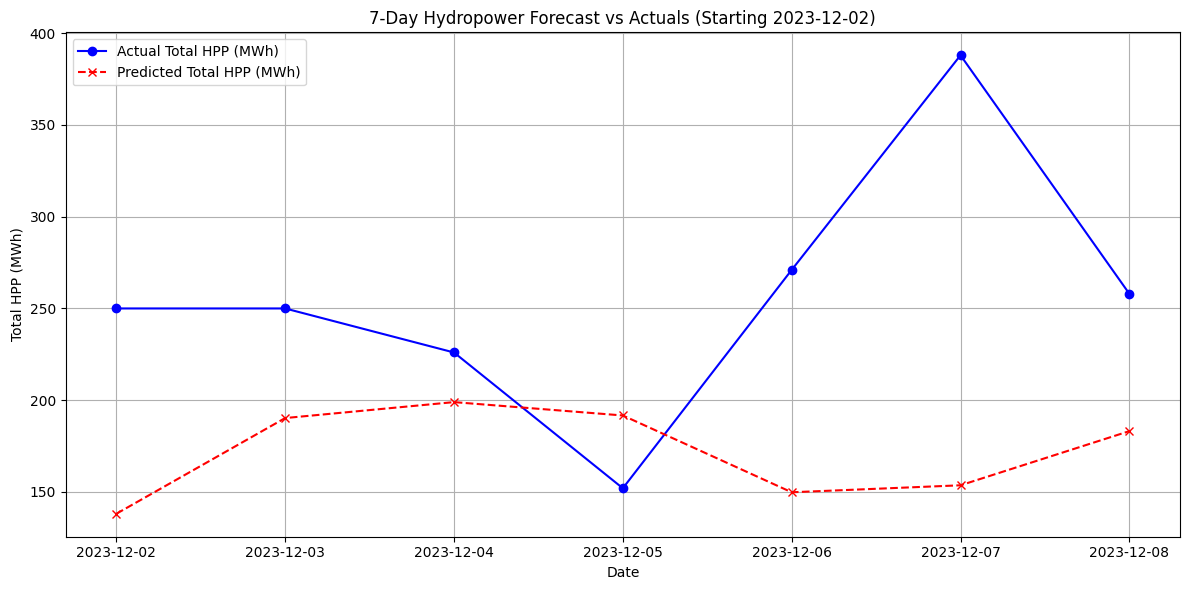

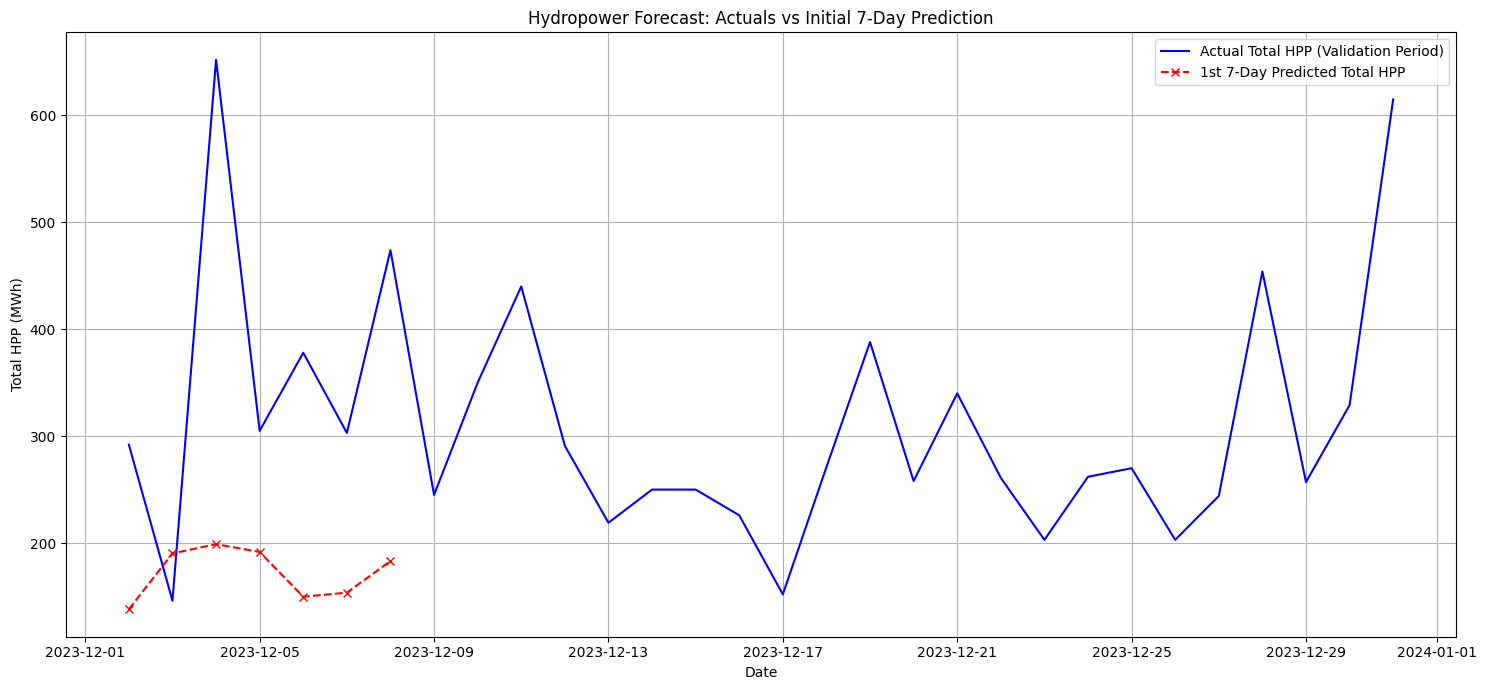

In [25]:
# Assuming y_pred and y_true are already defined and have shape (32, 7)

# --- Plotting the First 7-Day Forecast ---

# Select the first 7-day prediction and actuals
forecast_idx = 0 # You can change this to any index from 0 to 31
y_pred_first_week = y_pred[forecast_idx]
y_true_first_week = y_true[forecast_idx]

# Get the corresponding dates for this forecast window
# The validation_df contains the original time_idx and Date columns.
# The `forecast_idx`-th sample in the `validation` TimeSeriesDataSet
# corresponds to the `forecast_idx`-th row in `validation_df`
# (because stop_randomization=True and min_prediction_idx is sequential).
start_time_idx_for_sample = validation_df["time_idx"].iloc[forecast_idx]

# Now, retrieve the actual Date column from the original merged_df
# that corresponds to this 7-day prediction window.
# It starts at start_time_idx_for_sample and spans max_prediction_length days.
forecast_dates = pd.to_datetime(merged_df[merged_df["time_idx"].between(
    start_time_idx_for_sample, start_time_idx_for_sample + max_prediction_length - 1
)]["Date"].values)

# Safety check: Ensure we have enough dates for the prediction length
if len(forecast_dates) != max_prediction_length:
    print(f"WARNING: Expected {max_prediction_length} dates for forecast window {forecast_idx}, but got {len(forecast_dates)}.")
    print("This might happen if the validation period is too short at its end to provide a full 7-day window for later samples.")
    # You might need to adjust your validation_days or training_cutoff if this becomes a common issue.


plt.figure(figsize=(12, 6))
plt.plot(forecast_dates, y_true_first_week, label='Actual Total HPP (MWh)', color='blue', marker='o', linestyle='-')
plt.plot(forecast_dates, y_pred_first_week, label='Predicted Total HPP (MWh)', color='red', marker='x', linestyle='--')

plt.title(f'7-Day Hydropower Forecast vs Actuals (Starting {forecast_dates[0].strftime("%Y-%m-%d")})')
plt.xlabel('Date')
plt.ylabel('Total HPP (MWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Optional: Plotting a Longer Continuous Period ---
# This part plots the actuals over the entire validation period and
# overlays the very first 7-day forecast.

# Get the full date range and actual values for the validation period directly from validation_df
full_validation_dates = pd.to_datetime(validation_df["Date"].values)
actual_validation_series = validation_df[target_column].values

plt.figure(figsize=(15, 7))
plt.plot(full_validation_dates, actual_validation_series, label='Actual Total HPP (Validation Period)', color='blue')

# Plot the first 7-day prediction (y_pred[0])
# This aligns with the first max_prediction_length dates of the full_validation_dates.
plt.plot(full_validation_dates[:max_prediction_length], y_pred[0], label='1st 7-Day Predicted Total HPP', color='red', linestyle='--', marker='x')


plt.title('Hydropower Forecast: Actuals vs Initial 7-Day Prediction')
plt.xlabel('Date')
plt.ylabel('Total HPP (MWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

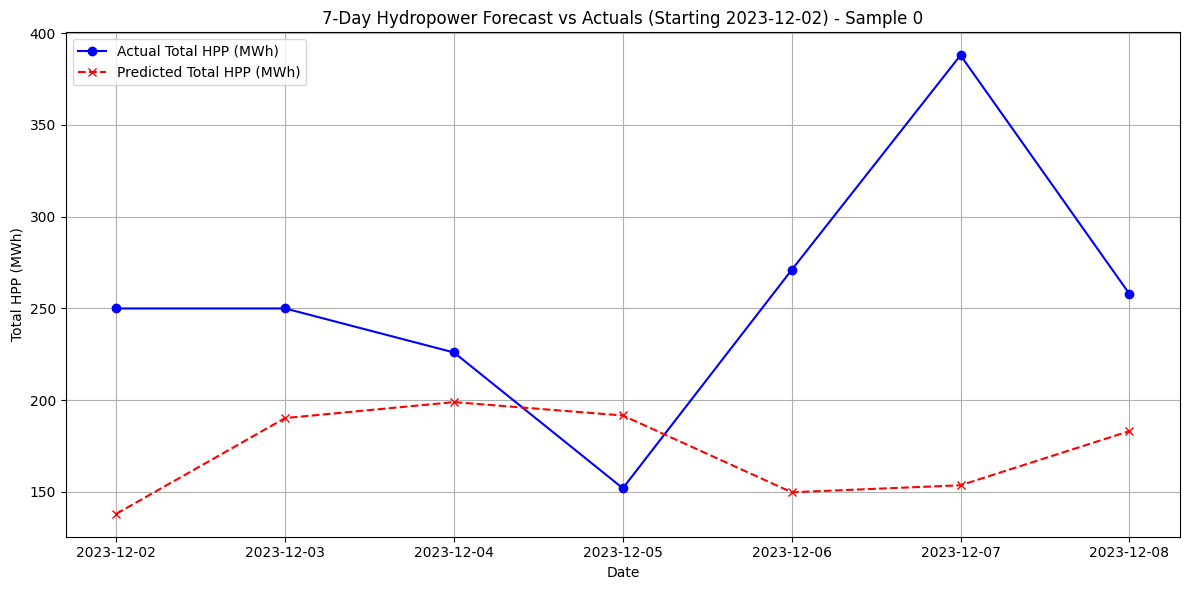

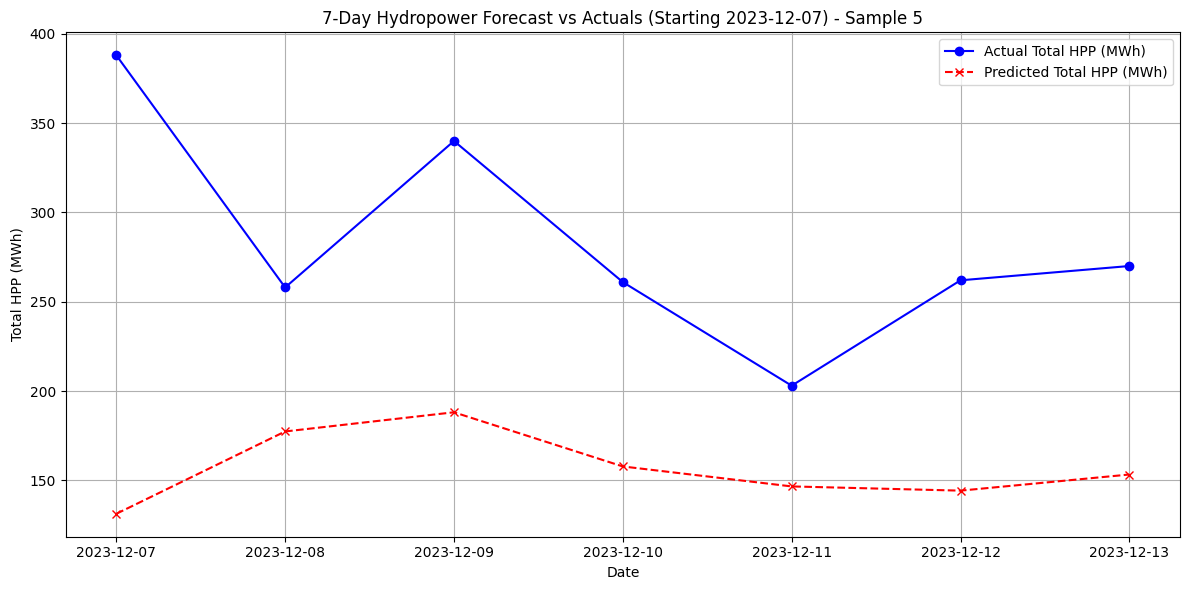

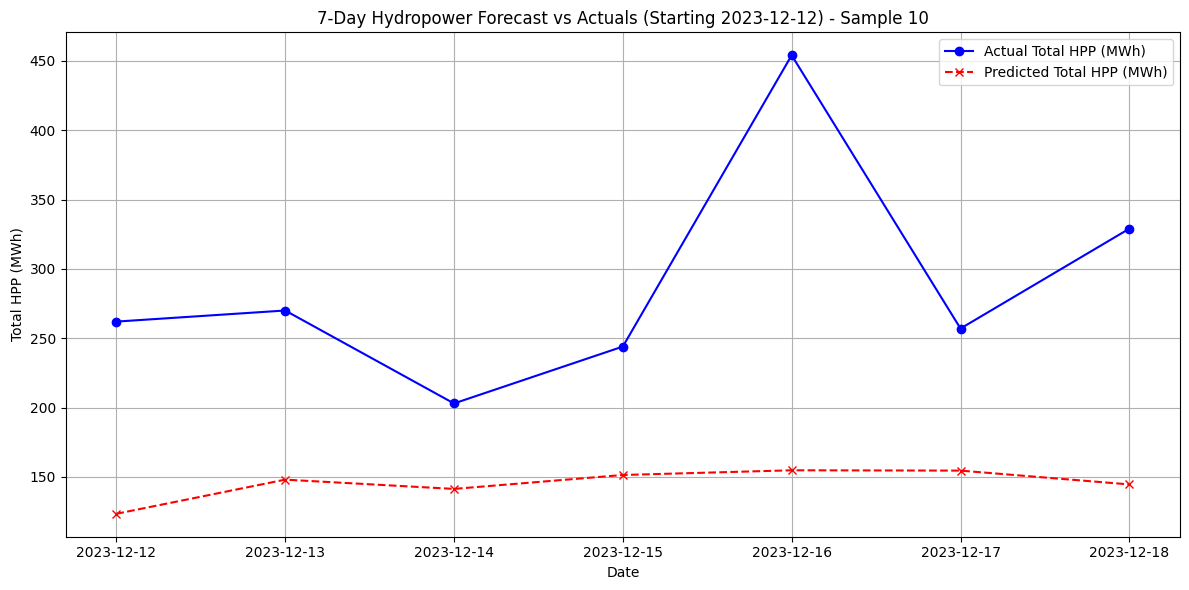

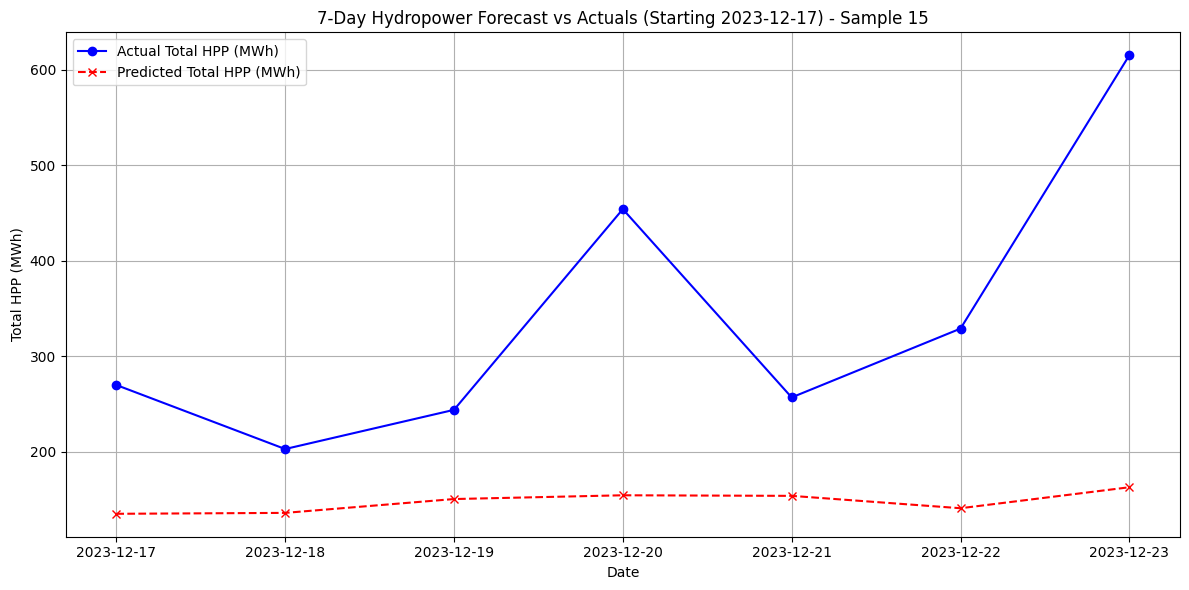

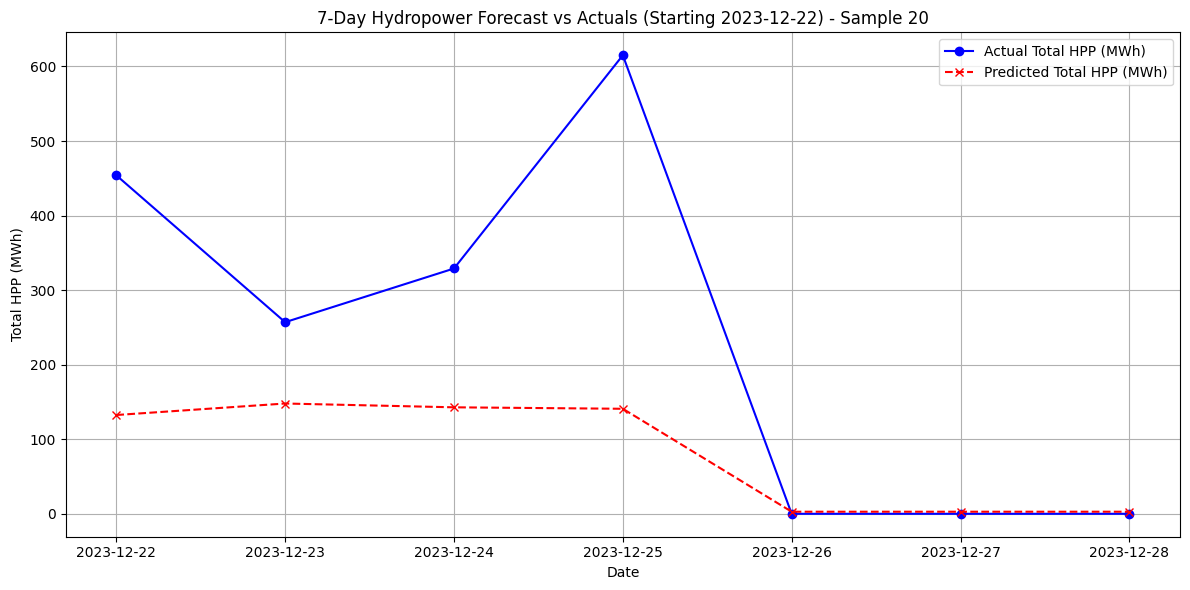

IndexError: single positional indexer is out-of-bounds

In [ ]:
# Assuming y_pred and y_true are already defined and have shape (32, 7)
# Also assuming merged_df, validation_df, max_prediction_length, and target_column are available

# --- Plotting Multiple 7-Day Forecasts ---

# Choose a few forecast indices to plot.
# Try to pick them from different parts of your validation set.
# e.g., start, middle, end, or specific dates you know might be challenging.
forecast_indices_to_plot = [0, 5, 10, 15, 20, 25, 30] # Examples: First, and then every 5th sample

for forecast_idx in forecast_indices_to_plot:
    if forecast_idx >= len(y_true):
        print(f"Skipping forecast_idx {forecast_idx} as it's out of bounds.")
        continue

    # Select the specific 7-day prediction and actuals for this index
    y_pred_current_week = y_pred[forecast_idx]
    y_true_current_week = y_true[forecast_idx]

    # Get the corresponding dates for this forecast window
    start_time_idx_for_sample = validation_df["time_idx"].iloc[forecast_idx]

    forecast_dates = pd.to_datetime(merged_df[merged_df["time_idx"].between(
        start_time_idx_for_sample, start_time_idx_for_sample + max_prediction_length - 1
    )]["Date"].values)

    # Safety check: Ensure we have enough dates for the prediction length
    if len(forecast_dates) != max_prediction_length:
        print(f"WARNING: Expected {max_prediction_length} dates for forecast window {forecast_idx}, but got {len(forecast_dates)}.")
        # If this warning appears often, your validation_df might be too short or sampling is an issue.
        continue # Skip plotting this particular one if dates don't match

    plt.figure(figsize=(12, 6))
    plt.plot(forecast_dates, y_true_current_week, label='Actual Total HPP (MWh)', color='blue', marker='o', linestyle='-')
    plt.plot(forecast_dates, y_pred_current_week, label='Predicted Total HPP (MWh)', color='red', marker='x', linestyle='--')

    plt.title(f'7-Day Hydropower Forecast vs Actuals (Starting {forecast_dates[0].strftime("%Y-%m-%d")}) - Sample {forecast_idx}')
    plt.xlabel('Date')
    plt.ylabel('Total HPP (MWh)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# The "Optional: Plotting a Longer Continuous Period" block from before
# remains unchanged as it typically plots the entire validation period
# and overlays just the very first forecast for context. You can keep that
# if you find it useful.
# ... (your existing code for the longer continuous plot can go here) ...